In [1]:
%pylab inline
import numpy as np
from sklearn import linear_model
cls = linear_model.SGDClassifier(max_iter=1000)

# Some sklearn versions spam warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


0.802


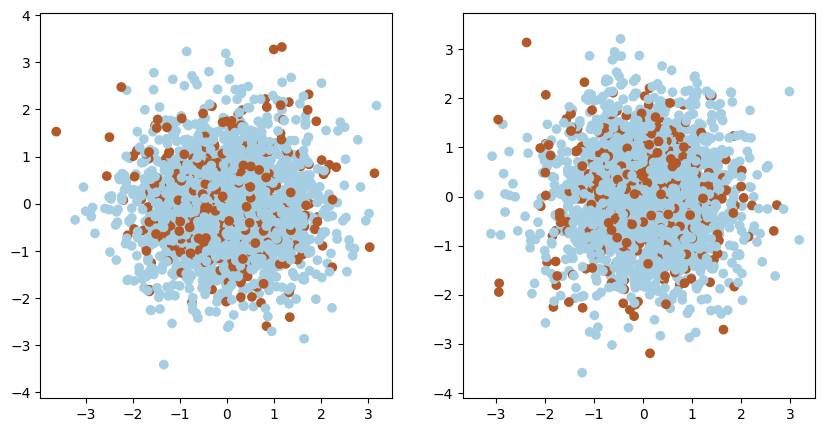

In [2]:
def separate_points(N=2000, d=2):
    X = np.random.normal(0,1,size=(N, d))
    y = np.random.rand(N) >= 0.8

    # Fit the first classifier
    cls.fit(X, y)
    # Let's project all points along the decision boundary of the first classifier
    p1 = cls.coef_ / np.linalg.norm(cls.coef_)
    d1 = X.dot(p1.T)
    score = cls.score(X, y)

    cls.fit(X - d1*p1, y)
    p2 = cls.coef_ / np.linalg.norm(cls.coef_)
    d2 = X.dot(p2.T)

    figure(figsize=(10,5))
    subplot(1,2,1)
    scatter(*X[:,:2].T, c=y.flat, cmap='Paired')
    axis('equal')
    subplot(1,2,2)
    scatter(d1.flat, d2.flat, c=y.flat, cmap='Paired')
    axis('equal')

    print( score )
separate_points(2000, 2)

0.81525


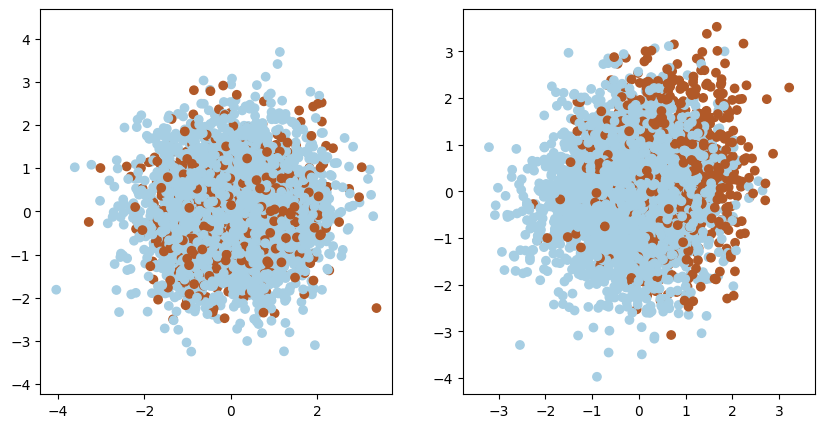

In [3]:
separate_points(4000, 1000)

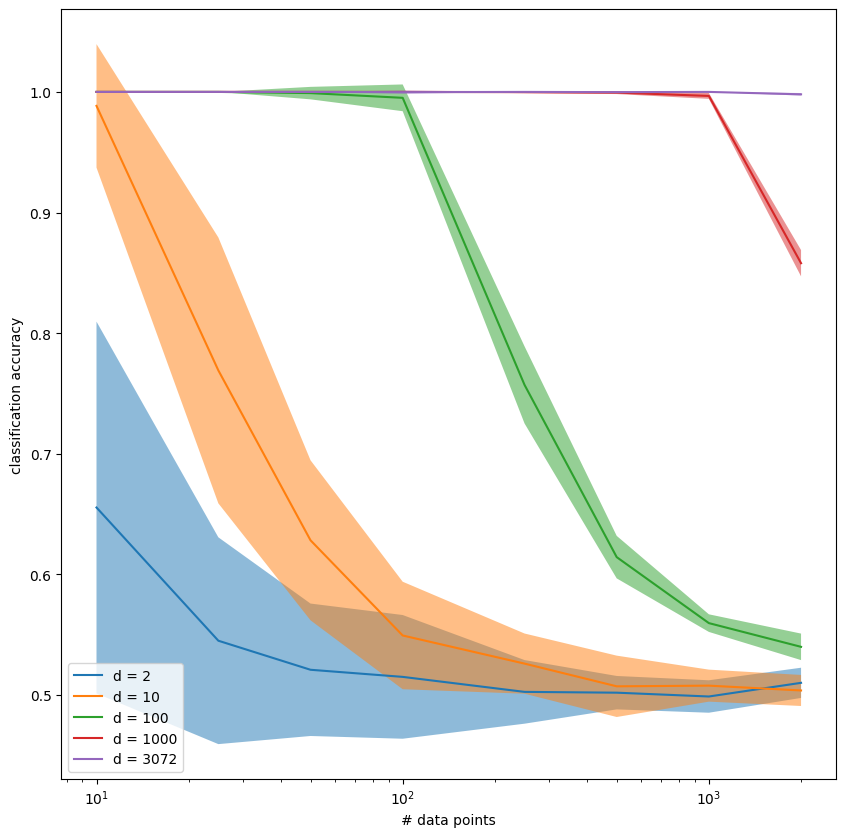

In [4]:
def plot_sep(d=2, N=[10,25,50,100,250,500,1000,2000]):
    S = []
    mnS, mxS = [], []
    for n in N:
        s = []
        for it in range(5000 // n + 1):
            X = np.random.normal(0,1,size=(n, d))
            y = np.random.rand(n)
            y = y > np.median(y)

            # Fit the first classifier
            s.append( cls.fit(X, y).score(X,y) )
        S.append(np.mean(s))
#         mnS.append(np.min(s))
#         mxS.append(np.max(s))
        mnS.append(np.mean(s) - np.std(s))
        mxS.append(np.mean(s) + np.std(s))
    fill_between(N, mnS, mxS, alpha=0.5)
    plot(N,S, label='d = %d'%d)
    xlabel('# data points')
    ylabel('classification accuracy')
    xscale('log')
    legend()

figure(figsize=(10,10))
plot_sep(2)
plot_sep(10)
plot_sep(100)
plot_sep(1000)
plot_sep(32*32*3)

In [5]:
224*224*3

150528